In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm

C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor, CatBoostClassifier

In [113]:
def root_mean_squared_error(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5

def print_metrics(train_p, test_p, y_train_=y_train, y_test_=y_test):

    print(f"Train MAE: {mean_absolute_error(y_train_, train_p)}")
    print(f"Test  MAE: {mean_absolute_error(y_test_, test_p)}")
    print()
    print(f"Train MSE: {mean_squared_error(y_train_, train_p)}")
    print(f"Test  MSE: {mean_squared_error(y_test_, test_p)}")
    print()
    print(f"Train RMSE: {root_mean_squared_error(y_train_, train_p)}")
    print(f"Test  RMSE: {root_mean_squared_error(y_test_, test_p)}")
    print()
    print(f"Train RMSLE: {mean_squared_log_error(y_train_, train_p.clip(min=0), squared=False)}")
    print(f"Test  RMSLE: {mean_squared_log_error(y_test_, test_p.clip(min=0), squared=False)}")
    print()
    print(f"Train MAPE: {mean_absolute_percentage_error(y_train_, train_p)}")
    print(f"Test  MAPE: {mean_absolute_percentage_error(y_test_, test_p)}")

In [110]:
features = pd.read_pickle('features.pkl')
features_2 = pd.read_pickle('features_2.pkl')

In [111]:
train, test = train_test_split(features, shuffle=False)
train_2, test_2 = train_test_split(features_2, shuffle=False)

In [31]:
cat_features = ['user_enc', 'group_enc', 'exec_enc']

In [32]:
y_train = train.wait_time
X_train = train.drop(columns='wait_time')

y_test = test.wait_time
X_test = test.drop(columns='wait_time')

In [112]:
y_train_2 = train_2.wait_time
X_train_2 = train_2.drop(columns='wait_time')

y_test_2 = test_2.wait_time
X_test_2 = test_2.drop(columns='wait_time')

In [33]:
cat_model = CatBoostRegressor(cat_features=cat_features, verbose=False, random_state=5)
cat_model.fit(X_train, y_train)
preds_train = cat_model.predict(X_train)
preds_test = cat_model.predict(X_test)

print_metrics(preds_train, preds_test)

Train MAE: 11270.281851629534
Test  MAE: 37331.92885967225

Train MSE: 813540307.4306192
Test  MSE: 6529842056.487294

Train RMSE: 28522.62798955628
Test  RMSE: 80807.43812599985

Train RMSLE: 3.59198592145106
Test  RMSLE: 4.507887199301536

Train MAPE: 8.458745336616072e+16
Test  MAPE: 686.002303640246


In [34]:
cat_model = CatBoostRegressor(cat_features=cat_features, verbose=False, random_state=5, loss_function='MAE')
cat_model.fit(X_train, y_train)
preds_train = cat_model.predict(X_train)
preds_test = cat_model.predict(X_test)

print_metrics(preds_train, preds_test)

Train MAE: 15473.267528075923
Test  MAE: 30530.372891647607

Train MSE: 5267530613.810829
Test  MSE: 7140266363.266428

Train RMSE: 72577.75564049104
Test  RMSE: 84500.09682400624

Train RMSLE: 2.7709663212982907
Test  RMSLE: 3.430337336779506

Train MAPE: 3.505367632472871e+16
Test  MAPE: 163.57766508916072


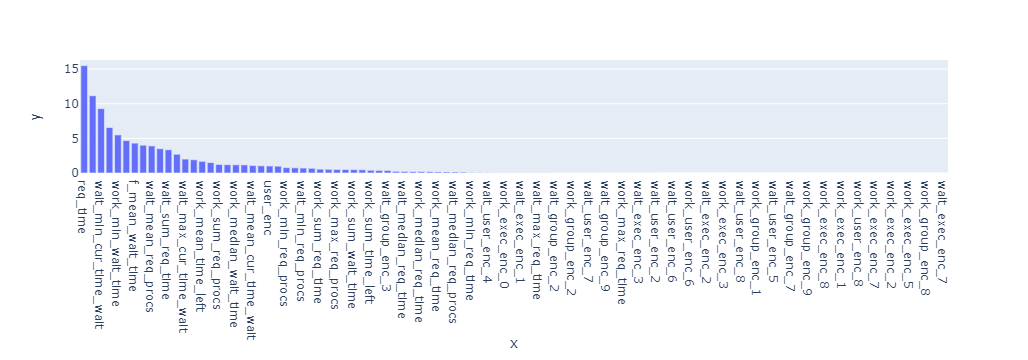

In [35]:
sorted_idx = np.argsort(cat_model.feature_importances_)
px.bar(
    x=np.array(cat_model.feature_names_)[sorted_idx][::-1],
    y=np.array(cat_model.feature_importances_)[sorted_idx][::-1]
)

In [36]:
best_features = np.array(cat_model.feature_names_)[sorted_idx][::-1][:10]

Train MAE: 12111.451026230088
Test  MAE: 32240.67242887438

Train MSE: 859287592.6328889
Test  MSE: 6350926126.877245

Train RMSE: 29313.607635923778
Test  RMSE: 79692.69807753559

Train RMSLE: 3.614398179078107
Test  RMSLE: 4.250115807157529

Train MAPE: 7.975483287082128e+16
Test  MAPE: 326.65779047529844


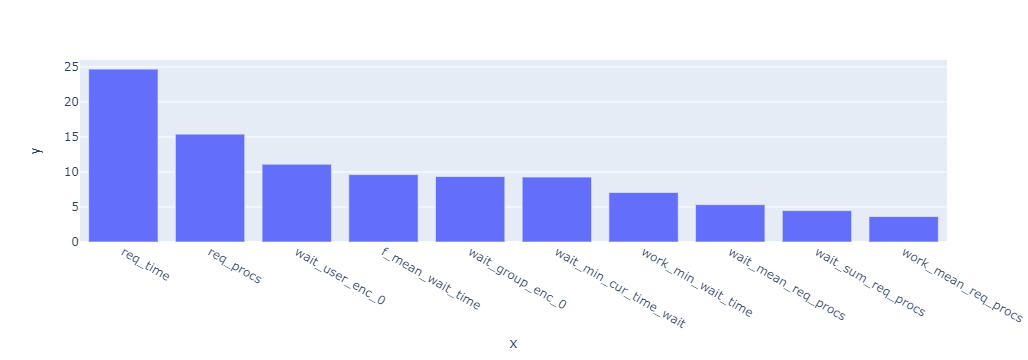

In [37]:
cat_model_2 = CatBoostRegressor(verbose=False, random_state=5)
cat_model_2.fit(X_train[best_features], y_train)

preds_train = cat_model_2.predict(X_train[best_features])
preds_test = cat_model_2.predict(X_test[best_features])

print_metrics(preds_train, preds_test)

sorted_idx_2 = np.argsort(cat_model_2.feature_importances_)
px.bar(
    x=np.array(cat_model_2.feature_names_)[sorted_idx_2][::-1],
    y=np.array(cat_model_2.feature_importances_)[sorted_idx_2][::-1]
)

Train MAE: 15522.576361229563
Test  MAE: 30629.32294662054

Train MSE: 4784867520.418577
Test  MSE: 7150620425.970553

Train RMSE: 69172.73682903241
Test  RMSE: 84561.34120252915

Train RMSLE: 2.7069299247522713
Test  RMSLE: 3.380700631033475

Train MAPE: 2.550817053912752e+16
Test  MAPE: 210.65558364258075


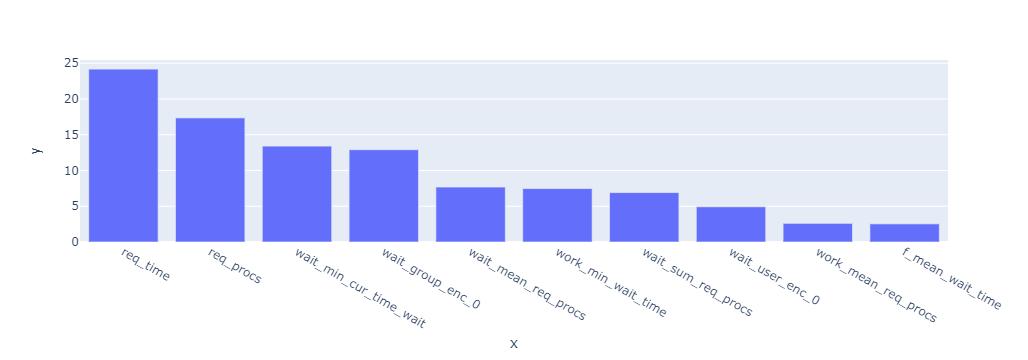

In [38]:
cat_model_2 = CatBoostRegressor(verbose=False, random_state=5, loss_function='MAE')
cat_model_2.fit(X_train[best_features], y_train)

preds_train = cat_model_2.predict(X_train[best_features])
preds_test = cat_model_2.predict(X_test[best_features])

print_metrics(preds_train, preds_test)

sorted_idx_2 = np.argsort(cat_model_2.feature_importances_)
px.bar(
    x=np.array(cat_model_2.feature_names_)[sorted_idx_2][::-1],
    y=np.array(cat_model_2.feature_importances_)[sorted_idx_2][::-1]
)

In [57]:
y_train_df = pd.DataFrame(data=np.array([y_train, preds_train]).T, columns=['true', 'predict'])
y_test_df = pd.DataFrame(data=np.array([y_test, preds_test]).T, columns=['true', 'predict'])

In [114]:
cat_model_2 = CatBoostRegressor(verbose=False, random_state=5, loss_function='MAE')
cat_model_2.fit(X_train_2[best_features], y_train_2)

preds_train = cat_model_2.predict(X_train_2[best_features])
preds_test = cat_model_2.predict(X_test_2[best_features])

print_metrics(preds_train, preds_test, y_train_2, y_test_2)

Train MAE: 13649.738503253076
Test  MAE: 30731.91124147788

Train MSE: 2164793272.185312
Test  MSE: 5908590954.664775

Train RMSE: 46527.33897597532
Test  RMSE: 76867.35948804782

Train RMSLE: 2.699130725835596
Test  RMSLE: 3.4361850404691214

Train MAPE: 2.483018574574197e+16
Test  MAPE: 249.80354995728402


In [122]:
cat_model_2 = CatBoostRegressor(verbose=False, random_state=5, l2_leaf_reg=100)
cat_model_2.fit(X_train_2[best_features], y_train_2)

preds_train = cat_model_2.predict(X_train_2[best_features])
preds_test = cat_model_2.predict(X_test_2[best_features])

print_metrics(preds_train, preds_test, y_train_2, y_test_2)

Train MAE: 16721.405050300116
Test  MAE: 31617.532256664734

Train MSE: 1800891730.3925104
Test  MSE: 5555511169.856685

Train RMSE: 42436.91471340147
Test  RMSE: 74535.30150107856

Train RMSLE: 3.9109606997604915
Test  RMSLE: 3.9471157312660448

Train MAPE: 9.951194103309414e+16
Test  MAPE: 348.47189203493593


In [106]:
# help(CatBoostClassifier)

Train MAE: 15554.953177706948
Test  MAE: 31639.417761647204

Train MSE: 4654158695.279593
Test  MSE: 7317823939.663969

Train RMSE: 68221.39470341832
Test  RMSE: 85544.28057832955

Train RMSLE: 2.7481551746322395
Test  RMSLE: 3.529573366442271

Train MAPE: 2.7807304425211504e+16
Test  MAPE: 291.43312255421


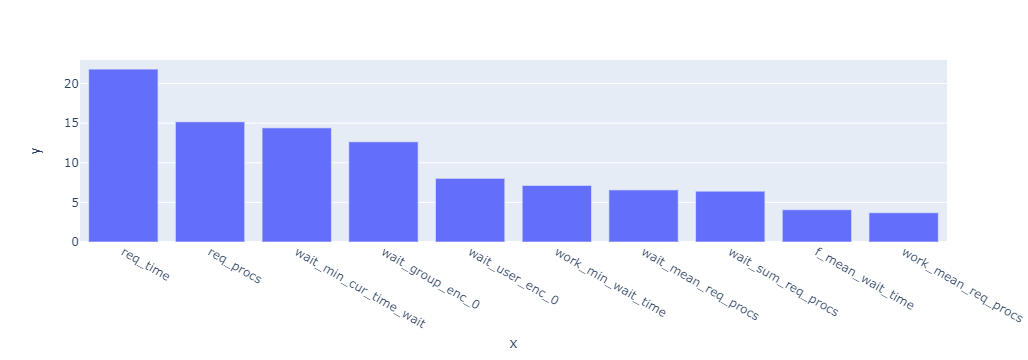

In [108]:
cat_model_2 = CatBoostRegressor(verbose=False, random_state=5, loss_function='MAE', l2_leaf_reg=100)
cat_model_2.fit(X_train[best_features], y_train)

preds_train = cat_model_2.predict(X_train[best_features])
preds_test = cat_model_2.predict(X_test[best_features])

print_metrics(preds_train, preds_test)

sorted_idx_2 = np.argsort(cat_model_2.feature_importances_)
px.bar(
    x=np.array(cat_model_2.feature_names_)[sorted_idx_2][::-1],
    y=np.array(cat_model_2.feature_importances_)[sorted_idx_2][::-1]
)

In [97]:
train_mask = X_train.req_time < 4000
test_mask = X_test.req_time < 4000

cat_model_4 = CatBoostRegressor(verbose=False, random_state=5, loss_function='MAE')
cat_model_4.fit(X_train[best_features][train_mask], y_train[train_mask])

preds_train = cat_model_4.predict(X_train[best_features][train_mask])
preds_test = cat_model_4.predict(X_test[best_features][test_mask])

print_metrics(preds_train, preds_test, y_train[train_mask], y_test[test_mask])

y_train_df = pd.DataFrame(data=np.array([y_train[train_mask], preds_train]).T, columns=['true', 'predict'])
y_test_df = pd.DataFrame(data=np.array([y_test[test_mask], preds_test]).T, columns=['true', 'predict'])

Train MAE: 3576.197754890035
Test  MAE: 7578.161707396254

Train MSE: 273322160.8043585
Test  MSE: 351852969.88557297

Train RMSE: 16532.4577968419
Test  RMSE: 18757.744264318484

Train RMSLE: 2.142495593281931
Test  RMSLE: 3.227370043945917

Train MAPE: 2107741851212175.0
Test  MAPE: 144.48373388162886


In [98]:
px.line(y_train_df, markers=True)

In [99]:
px.line(y_test_df, markers=True)

In [41]:
mean_train_preds = np.full(fill_value=train.wait_time.mean(), shape=train.shape[0])
mean_test_preds = np.full(fill_value=train.wait_time.mean(), shape=test.shape[0])

median_train_preds = np.full(fill_value=train.wait_time.median(), shape=train.shape[0])
median_test_preds = np.full(fill_value=train.wait_time.median(), shape=test.shape[0])

In [42]:
print_metrics(mean_train_preds, mean_test_preds)

Train MAE: 37120.4336911262
Test  MAE: 47727.1362396468

Train MSE: 12212796941.242262
Test  MSE: 11188929021.205599

Train RMSE: 110511.52402008699
Test  RMSE: 105777.7340521416

Train RMSLE: 5.375161783278843
Test  RMSLE: 5.239536636134747

Train MAPE: 4.661818301675898e+17
Test  MAPE: 1171.1682176195668


In [43]:
print_metrics(median_train_preds, median_test_preds)

Train MAE: 25386.868381441473
Test  MAE: 37936.41022576361

Train MSE: 12847697398.386444
Test  MSE: 12456733426.485592

Train RMSE: 113347.68369219745
Test  RMSE: 111609.7371490749

Train RMSLE: 3.6081112988634656
Test  RMSLE: 3.831598574308138

Train MAPE: 3989597509460061.0
Test  MAPE: 9.981106855864278


In [17]:
# px.histogram(train.wait_time[train.wait_time < 50])

****

In [123]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [147]:
task = Task(
    name = 'reg', loss = 'mae'
)
reader_params = {'random_state': 1}
general_params = {'use_algos': [['linear_l2', 'lgb', 'lgb_tuned', 'cb', 'cb_tuned'], ['linear_l2', 'lgb']]}
# roles = {'target': 'wait_time', 'category': cat_features}
roles = {'target': 'wait_time'}

In [148]:
# train, test

In [149]:
automl = TabularAutoML(
    task=task, reader_params=reader_params, general_params=general_params, timeout=3600 * 5
)

In [156]:
oof_pred = automl.fit_predict(
    train[list(best_features) + ['wait_time']],
    roles=roles,
    verbose = 1
)
test_pred = automl.predict(test[list(best_features) + ['wait_time']])

[23:48:33] Stdout logging level is INFO.
[23:48:33] Task: reg

[23:48:33] Start automl preset with listed constraints:
[23:48:33] - time: 18000.00 seconds
[23:48:33] - CPU: 4 cores
[23:48:33] - memory: 16 GB

[23:48:33] Train data shape: (22588, 11)

[23:48:37] Layer 1 train process start. Time left 17995.24 secs
[23:48:38] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[23:48:43] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -5731037476.31261
[23:48:43] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[23:48:43] Time left 17989.08 secs

[23:48:49] Selector_LightGBM fitting and predicting completed
[23:48:50] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[23:49:04] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -4059322996.4387097
[23:49:04] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[23:49:04] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs
[23:54:20] Hyperparameters optimization for Lv

In [157]:
print_metrics(oof_pred.data[:, 0], test_pred.data[:, 0])

Train MAE: 15430.292953368376
Test  MAE: 31615.775601403497

Train MSE: 3933017855.000303
Test  MSE: 8137795962.922238

Train RMSE: 62713.777234354995
Test  RMSE: 90209.7331939422

Train RMSLE: 3.301958107884756
Test  RMSLE: 3.445880611592001

Train MAPE: 6.611542167708535e+16
Test  MAPE: 146.90593125908404
